In [26]:
# Load modules

import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [37]:
# Define a function for data processing

def process_data(data, timestamp_str, label):
    # Convert timestamps to Unix timestamps
    unix_timestamp = []

    for i in range(len(timestamp_str)):
        timestamp = datetime.strptime(timestamp_str[i], "%Y-%m-%dT%H:%M:%S.%f")
        
        # Calculate the difference in seconds from a reference point
        timestamp_difference = timestamp - datetime(1970, 1, 1)
        
        # Store the difference as a floating-point number
        unix_timestamp.append(timestamp_difference.total_seconds())

    # Extract data components
    Bx = data[:, 0]
    By = data[:, 1]
    Bz = data[:, 2]
    B_mag = data[:, 3]
    x = data[:, 4]
    y = data[:, 5]
    z = data[:, 6]

    return Bx, By, Bz, B_mag, x, y, z, unix_timestamp, label


# Define a fucntion to plot B-field components

def plot_magnetic_field(unix_timestamp, Bx, By, Bz, B_mag, flyby):
    fig, axes = plt.subplots(4, 1, figsize=(7, 6), sharex=True)

    # Plot Bx in the first subplot
    axes[0].plot(unix_timestamp, Bx, label="$B_x$")
    axes[0].set_ylabel('$B_x$ [nT]')
    axes[0].set_title(f"Callisto Flyby: {flyby}")

    # Plot By in the second subplot
    axes[1].plot(unix_timestamp, By, label="$B_y$")
    axes[1].set_ylabel('$B_y$ [nT]')

    # Plot Bz in the third subplot
    axes[2].plot(unix_timestamp, Bz, label="$B_z$")
    axes[2].set_ylabel('$B_z$ [nT]')

    # Magnitude of B
    axes[3].plot(unix_timestamp, B_mag, label="|B|")
    axes[3].set_xlabel('Unix Timestamp [s]')
    axes[3].set_ylabel('|B| [nT]')

    plt.tight_layout()
    plt.show()


# Define a function to add a circle to a plot

def add_callisto_circle(ax):
    callisto = plt.Circle((0, 0), 1, color='black')
    ax.add_patch(callisto)
    return ax


# Define a function to convert from Cartesian to Spherical coords

def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    #theta = np.arctan(x/y)
    theta = np.e**(np.log(x)-np.log(y))
    phi = np.arccos(z/r)
    return r, theta, phi


In [28]:
# WIP - creating a plot style


# Define the hex color codes
colors = ['#f94144', '#f3722c', '#f8961e', '#f9c74f', '#90be6d', '#43aa8b', '#577590']

# Create a custom color map using the defined colors
custom_cmap = mpl.colors.ListedColormap(colors)

# Create a custom style based on the ggplot style
space = {
    'axes.facecolor': 'lightgray', # Background color
    'axes.edgecolor': 'white',     # Color of axes edges
    'axes.labelcolor': 'black',    # Color of labels
    'xtick.color': 'black',        # Color of x-axis ticks
    'ytick.color': 'black',        # Color of y-axis ticks
    'grid.color': 'white',         # Color of gridlines
    'lines.linewidth': 2,          # Line width
    'lines.markersize': 8,         # Marker size
    'patch.edgecolor': 'white',    # Color of patch edges
    'text.color': 'black',         # Color of text
    'font.size': 12,               # Font size
    'axes.prop_cycle': plt.cycler(color=colors),  
}

# Set the custom style
plt.style.use('ggplot')
mpl.style.use(space)



In [29]:
# Load the datasets

data_03 = np.loadtxt("./galileo-mag-jup-calibrated/ORB03_CALL_CPHIO.TAB", usecols=(1, 2, 3, 4, 5, 6, 7))
timestamp_str_03 = np.loadtxt("./galileo-mag-jup-calibrated/ORB03_CALL_CPHIO.TAB", usecols=0, dtype=str)

data_09 = np.loadtxt("./galileo-mag-jup-calibrated/ORB09_CALL_CPHIO.TAB", usecols=(1, 2, 3, 4, 5, 6, 7))
timestamp_str_09 = np.loadtxt("./galileo-mag-jup-calibrated/ORB09_CALL_CPHIO.TAB", usecols=0, dtype=str)

data_10 = np.loadtxt("./galileo-mag-jup-calibrated/ORB10_CALL_CPHIO.TAB", usecols=(1, 2, 3, 4, 5, 6, 7))
timestamp_str_10 = np.loadtxt("./galileo-mag-jup-calibrated/ORB10_CALL_CPHIO.TAB", usecols=0, dtype=str)

data_21 = np.loadtxt("./galileo-mag-jup-calibrated/ORB21_CALL_CPHIO.TAB", usecols=(1, 2, 3, 4, 5, 6, 7))
timestamp_str_21 = np.loadtxt("./galileo-mag-jup-calibrated/ORB21_CALL_CPHIO.TAB", usecols=0, dtype=str)

data_22 = np.loadtxt("./galileo-mag-jup-calibrated/ORB22_CALL_CPHIO.TAB", usecols=(1, 2, 3, 4, 5, 6, 7))
timestamp_str_22 = np.loadtxt("./galileo-mag-jup-calibrated/ORB22_CALL_CPHIO.TAB", usecols=0, dtype=str)

data_23 = np.loadtxt("./galileo-mag-jup-calibrated/ORB23_CALL_CPHIO.TAB", usecols=(1, 2, 3, 4, 5, 6, 7))
timestamp_str_23 = np.loadtxt("./galileo-mag-jup-calibrated/ORB23_CALL_CPHIO.TAB", usecols=0, dtype=str)

data_30 = np.loadtxt("./galileo-mag-jup-calibrated/ORB30_CALL_CPHIO.TAB", usecols=(1, 2, 3, 4, 5, 6, 7))
timestamp_str_30 = np.loadtxt("./galileo-mag-jup-calibrated/ORB30_CALL_CPHIO.TAB", usecols=0, dtype=str)

In [30]:
# Process the data for each dataset

Bx_03, By_03, Bz_03, B_mag_03, x_03, y_03, z_03, unix_timestamp_03, label_03 = process_data(data_03, timestamp_str_03, 'ORB03')
Bx_09, By_09, Bz_09, B_mag_09, x_09, y_09, z_09, unix_timestamp_09, label_09 = process_data(data_09, timestamp_str_09, 'ORB09')
Bx_10, By_10, Bz_10, B_mag_10, x_10, y_10, z_10, unix_timestamp_10, label_10 = process_data(data_10, timestamp_str_10, 'ORB10')
Bx_21, By_21, Bz_21, B_mag_21, x_21, y_21, z_21, unix_timestamp_21, label_21 = process_data(data_21, timestamp_str_21, 'ORB21')
Bx_22, By_22, Bz_22, B_mag_22, x_22, y_22, z_22, unix_timestamp_22, label_22 = process_data(data_22, timestamp_str_22, 'ORB22')
Bx_23, By_23, Bz_23, B_mag_23, x_23, y_23, z_23, unix_timestamp_23, label_23 = process_data(data_23, timestamp_str_23, 'ORB23')
Bx_30, By_30, Bz_30, B_mag_30, x_30, y_30, z_30, unix_timestamp_30, label_30 = process_data(data_30, timestamp_str_30, 'ORB30')

In [38]:
# Convert to spherical coords

r_03, theta_03, phi_03 = cartesian_to_spherical(x_03, y_03, z_03)
r_09, theta_09, phi_09 = cartesian_to_spherical(x_09, y_09, z_09)
r_10, theta_10, phi_10 = cartesian_to_spherical(x_10, y_10, z_10)
r_21, theta_21, phi_21 = cartesian_to_spherical(x_21, y_21, z_21)
r_22, theta_22, phi_22 = cartesian_to_spherical(x_22, y_22, z_22)
r_23, theta_23, phi_23 = cartesian_to_spherical(x_23, y_23, z_23)
r_30, theta_30, phi_30 = cartesian_to_spherical(x_30, y_30, z_30)

C:\Users\mikoo\AppData\Local\Temp\ipykernel_12812\864470908.py:68: RuntimeWarning: invalid value encountered in log
  theta = np.e**(np.log(x)-np.log(y))
C:\Users\mikoo\AppData\Local\Temp\ipykernel_12812\864470908.py:68: RuntimeWarning: divide by zero encountered in log
  theta = np.e**(np.log(x)-np.log(y))


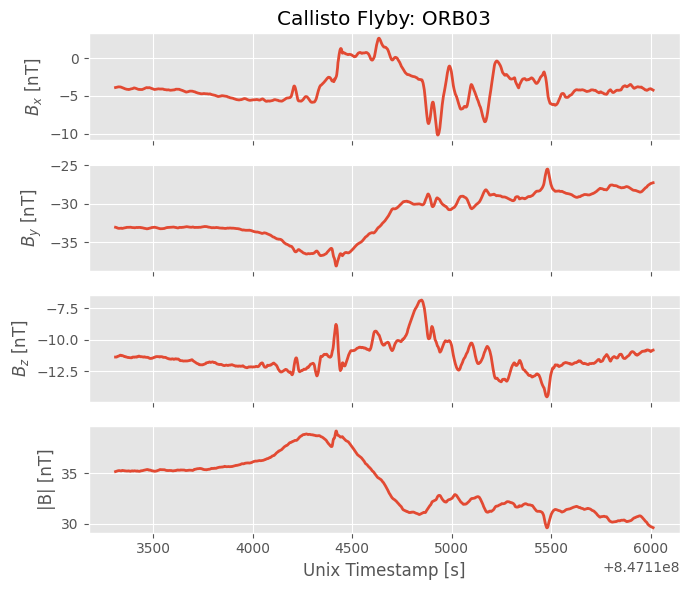

In [31]:
# Plot magnetic field components for given flyby

plt.style.use('ggplot')
plot_magnetic_field(unix_timestamp_03, Bx_03, By_03, Bz_03, B_mag_03, flyby='ORB03')

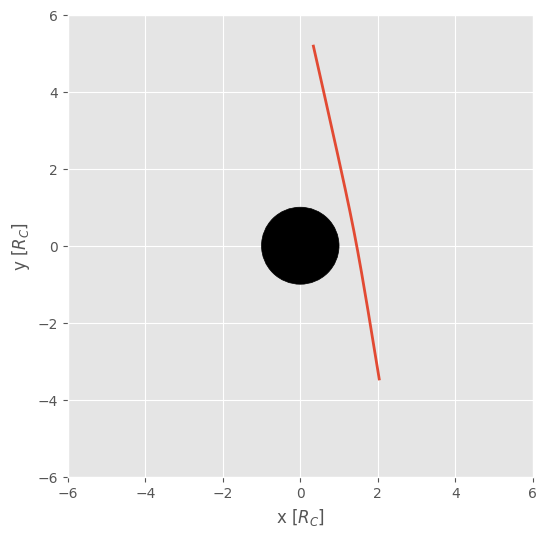

In [32]:
# Plot Galileo Trajectory

# Define the common x and y limits for all subplots
common_xlim = (-6, 6)  
common_ylim = (-6, 6)  

fig, ax = plt.subplots(figsize=(6, 6))
ax = add_callisto_circle(ax)

# Apply the common limits
ax.set_xlim(common_xlim)
ax.set_ylim(common_ylim)

# Plot the data
ax.plot(x_03, y_03, label=label_03)

# Set the labels
ax.set_xlabel('x [$R_C$]')
ax.set_ylabel('y [$R_C$]')

plt.show()


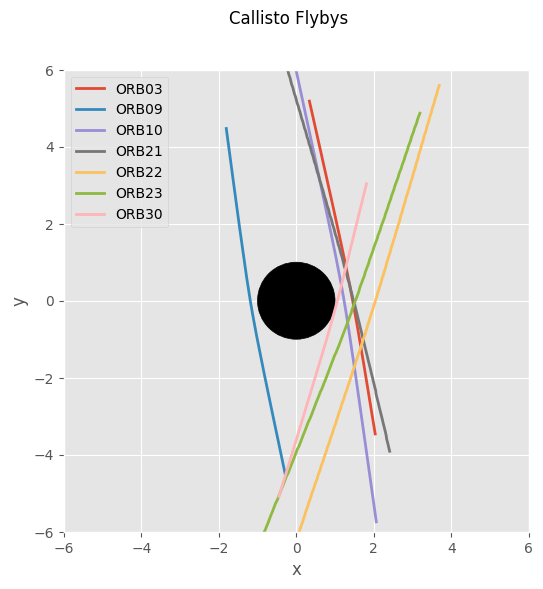

In [33]:
# Plot all trajectories

# Create a new figure and axis for the top-right subplot
fig, ax = plt.subplots(figsize=(6, 6))
ax = add_callisto_circle(ax)

# Apply the common limits to the top-right subplot
ax.set_xlim(common_xlim)
ax.set_ylim(common_ylim)

# Plot the data for the top-right subplot
ax.plot(x_03, y_03, label=label_03)
ax.plot(x_09, y_09, label=label_09)
ax.plot(x_10, y_10, label=label_10)
ax.plot(x_21, y_21, label=label_21)
ax.plot(x_22, y_22, label=label_22)
ax.plot(x_23, y_23, label=label_23)
ax.plot(x_30, y_30, label=label_30)

# Set the labels for the top-right subplot
ax.set_xlabel('x')
ax.set_ylabel('y')

# Add a legend to the top-right subplot
ax.legend()

# Set the title for the top-right subplot
fig.suptitle("Callisto Flybys")

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


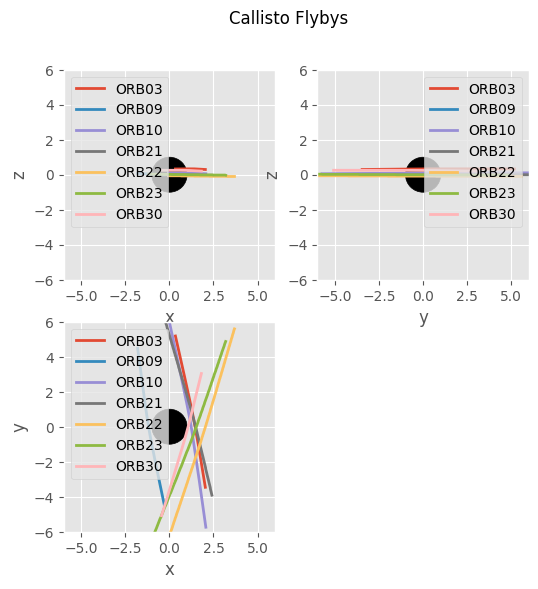

In [34]:
# ... in all orientations

fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# Add the Callisto circle to each subplot using the function
for i in range(2):
    for j in range(2):
        axes[i, j] = add_callisto_circle(axes[i, j])

# Apply the common limits to all subplots
for i in range(2):
    for j in range(2):
        axes[i, j].set_xlim(common_xlim)
        axes[i, j].set_ylim(common_ylim)

# First subplot: x against z
axes[0, 0].plot(x_03, z_03, label=label_03)
axes[0, 0].plot(x_09, z_09, label=label_09)
axes[0, 0].plot(x_10, z_10, label=label_10)
axes[0, 0].plot(x_21, z_21, label=label_21)
axes[0, 0].plot(x_22, z_22, label=label_22)
axes[0, 0].plot(x_23, z_23, label=label_23)
axes[0, 0].plot(x_30, z_30, label=label_30)
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('z')

# Second subplot: y against z
axes[0, 1].plot(y_03, z_03, label=label_03)
axes[0, 1].plot(y_09, z_09, label=label_09)
axes[0, 1].plot(y_10, z_10, label=label_10)
axes[0, 1].plot(y_21, z_21, label=label_21)
axes[0, 1].plot(y_22, z_22, label=label_22)
axes[0, 1].plot(y_23, z_23, label=label_23)
axes[0, 1].plot(y_30, z_30, label=label_30)
axes[0, 1].set_xlabel('y')
axes[0, 1].set_ylabel('z')

# Third subplot: x against y
axes[1, 0].plot(x_03, y_03, label=label_03)
axes[1, 0].plot(x_09, y_09, label=label_09)
axes[1, 0].plot(x_10, y_10, label=label_10)
axes[1, 0].plot(x_21, y_21, label=label_21)
axes[1, 0].plot(x_22, y_22, label=label_22)
axes[1, 0].plot(x_23, y_23, label=label_23)
axes[1, 0].plot(x_30, y_30, label=label_30)
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')

# Add a legend to the subplots
for i in range(2):
    for j in range(2):
        axes[i, j].legend()

# Remove the bottom-right subplot
fig.delaxes(axes[1, 1])

plt.suptitle("Callisto Flybys")
plt.show()


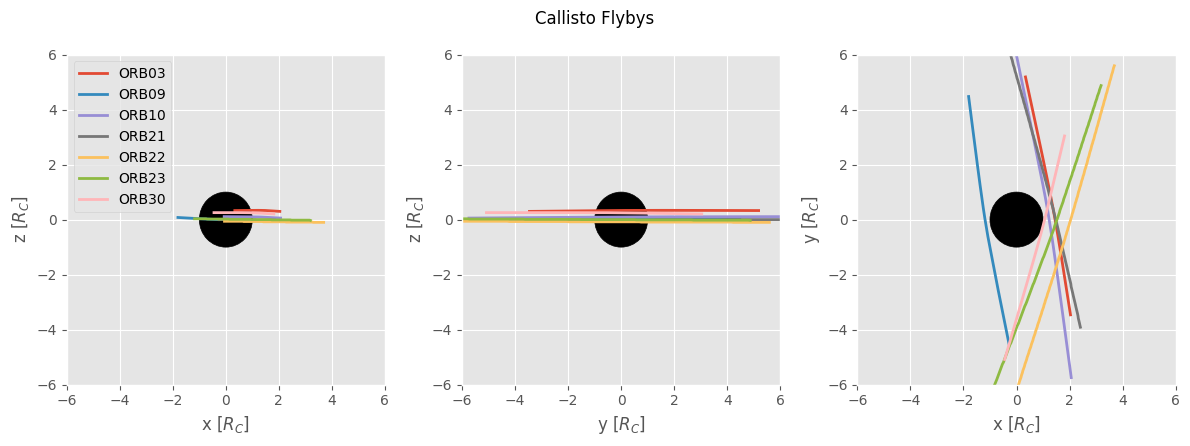

In [35]:
# Horizontally

# Define the common x and y limits for all subplots
common_xlim = (-6, 6)
common_ylim = (-6, 6)

plt.style.use('ggplot')
fig, axes = plt.subplots(1, 3, figsize=(12, 4.5))

# Add the Callisto circle to each subplot using the function
for i in range(3):
    axes[i] = add_callisto_circle(axes[i])

# Apply the common limits to all subplots
for i in range(3):
    axes[i].set_xlim(common_xlim)
    axes[i].set_ylim(common_ylim)

# First subplot: x against z
axes[0].plot(x_03, z_03, label=label_03)
axes[0].plot(x_09, z_09, label=label_09)
axes[0].plot(x_10, z_10, label=label_10)
axes[0].plot(x_21, z_21, label=label_21)
axes[0].plot(x_22, z_22, label=label_22)
axes[0].plot(x_23, z_23, label=label_23)
axes[0].plot(x_30, z_30, label=label_30)
axes[0].set_xlabel('x [$R_C$]')
axes[0].set_ylabel('z [$R_C$]')

# Second subplot: y against z
axes[1].plot(y_03, z_03, label=label_03)
axes[1].plot(y_09, z_09, label=label_09)
axes[1].plot(y_10, z_10, label=label_10)
axes[1].plot(y_21, z_21, label=label_21)
axes[1].plot(y_22, z_22, label=label_22)
axes[1].plot(y_23, z_23, label=label_23)
axes[1].plot(y_30, z_30, label=label_30)
axes[1].set_xlabel('y [$R_C$]')
axes[1].set_ylabel('z [$R_C$]')

# Third subplot: x against y
axes[2].plot(x_03, y_03, label=label_03)
axes[2].plot(x_09, y_09, label=label_09)
axes[2].plot(x_10, y_10, label=label_10)
axes[2].plot(x_21, y_21, label=label_21)
axes[2].plot(x_22, y_22, label=label_22)
axes[2].plot(x_23, y_23, label=label_23)
axes[2].plot(x_30, y_30, label=label_30)
axes[2].set_xlabel('x [$R_C$]')
axes[2].set_ylabel('y [$R_C$]')

axes[0].legend(loc='upper left')

plt.suptitle("Callisto Flybys")
plt.tight_layout()
plt.show()
